# Fix later - and make your own

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer.data
y= breast_cancer.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
#Import SGD Classifier
from sklearn.linear_model import SGDClassifier

#Create instance of Random Forest Classifier
sgd = SGDClassifier()

#Fit estimator to 70% of the data
sgd.fit(X_train, y_train)

#Predict final 30%
y_pred = sgd.predict(X_test)

In [5]:
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Create instance of Random Forest Classifier
rfc = RandomForestClassifier()

#Fit estimator to 70% of the data
rfc.fit(X_train, y_train)

#Predict final 30%
y_pred = rfc.predict(X_test)

In [7]:
X_test.shape

(171, 30)

In [10]:
"""sample_data = np.array([-10,-1,-2,3])
y_scores = sgd.decision_function(sample_data.reshape(1,-1))
y_scores
"""

'sample_data = np.array([-10,-1,-2,3])\ny_scores = sgd.decision_function(sample_data.reshape(1,-1))\ny_scores\n'

In [11]:
"""
threshold=0
y_sample_data_pred = (y_scores>threshold)
y_sample_data_pred
"""

'\nthreshold=0\ny_sample_data_pred = (y_scores>threshold)\ny_sample_data_pred\n'

In [17]:
from sklearn.model_selection import cross_val_predict

In [18]:
y_scores = cross_val_predict(sgd, X_train,y_train, cv=3,method='decision_function')

In [19]:
from sklearn.metrics import precision_recall_curve

precision,recall,thresholds = precision_recall_curve(y_test,y_pred)

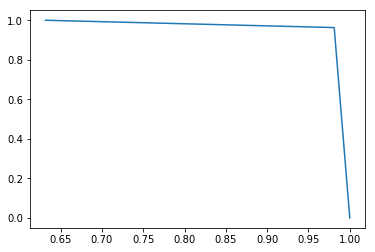

In [20]:
plt.plot(precision,recall);

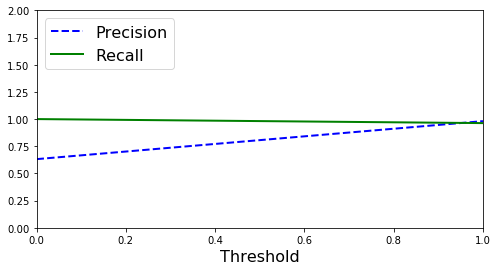

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 2])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.xlim([0, 1])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

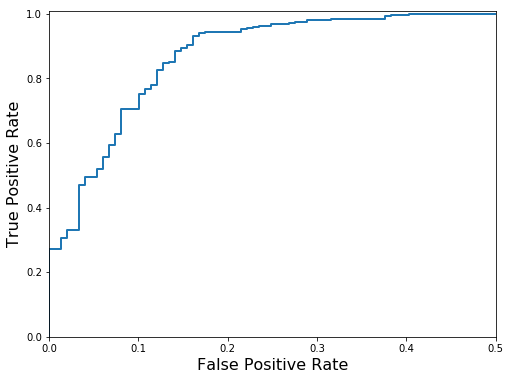

In [32]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.axis([0, .5, 0, 1.01])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()